<a href="https://colab.research.google.com/github/Isha055014/MLM-Project-Group-26/blob/main/MLM_Group_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Relevant Libraries

In [2]:
import pandas as pd, numpy as np                                                        # For Data Manipulation
import scipy.stats as stats                                                             # Importing the stats module from scipy
from scipy.stats import skew, kurtosis                                                  # For descriptive stats of non-cat variables
from scipy.stats import spearmanr                                                       # For Spearman correlation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder                          # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder                                         # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer                                    # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler            # For Rescaling Data
from sklearn.model_selection import train_test_split                                    # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt                                                         # For data visualization
from matplotlib import pyplot as pp                                                     # For data visualization
import seaborn as sns                                                                   # For data visualization

#### Upload Live Dataset

In [3]:
# File ID from Google Drive link
sg47_file_id = '1nX-OYPadLCWTWIKG0qTP6GVs2C5aZP1r'

# Construct the download URL
sg47_download_url = f'https://drive.google.com/uc?id={sg47_file_id}'

# Load the dataset
sg47_export_import_data = pd.read_csv(sg47_download_url)
sg47_export_import_data

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48df15a8-0823-4964-8c16-eddf2756f382,Marshall Islands,not,Export,2860,2055.19,09-07-2024,Furniture,South Karenfort,393463,4120.35,Land,Smith-Lewis,Darlene Davis,29605073,Net 60
14996,31106617-94a6-4646-a001-5e7bd45abc26,Bermuda,air,Export,2443,6407.06,18-06-2024,Furniture,Jeffreyside,484143,1832.71,Air,Jones Group,John Ramos,39044695,Cash on Delivery
14997,ee485839-fbde-4ced-af18-d98f5e863081,Tanzania,show,Export,1702,9918.29,30-04-2020,Toys,North Meganborough,354935,4203.52,Land,Barnes-Romero,Rebecca Phelps,78492040,Net 30
14998,5acd54aa-ec8c-4055-be8b-a447861a471c,Tuvalu,TV,Export,8108,9288.57,29-04-2021,Clothing,Villafurt,234296,1597.72,Land,"Smith, Allison and Bennett",Scott Yates,20799602,Cash on Delivery


#### Creating Sample of 5001 records from Live Dataset

In [4]:
sg47_sample_data = sg47_export_import_data.sample(n=5001, random_state=5504714)
sg47_sample_data

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
759,387cdf02-9e3b-4f04-9418-864590de6fba,Palestinian Territory,within,Import,2237,652.01,10-04-2024,Clothing,West Josephfort,472808,3801.19,Sea,"Webb, Bender and Harris",Troy Mcknight,98082261,Net 60
11393,eb05efb7-8c51-4c6f-a123-b120b481d422,Cote d'Ivoire,several,Import,1579,1569.34,07-10-2023,Clothing,Richardfort,887078,235.75,Sea,Harper Inc,Allen Smith,11355501,Net 60
14136,413f890b-96cd-4f5a-bc3c-e3f23d4488aa,Holy See (Vatican City State),year,Export,9104,3129.91,03-12-2019,Electronics,Kellichester,613489,3835.72,Land,York-Roberson,Wesley Jenkins,48993893,Net 60
13947,df771354-74c9-4843-bed7-56ff9cbac931,Gibraltar,across,Import,1250,8995.31,18-09-2021,Electronics,Port Rachaelchester,807860,556.18,Air,Martinez Group,Kristi Sanchez,13069556,Prepaid
6398,8c236c88-e995-4828-9ba9-2df9c6fc9080,Isle of Man,pass,Import,3096,2826.41,29-03-2020,Clothing,Jenniferhaven,716657,413.34,Air,Kelley-Gates,John Hernandez,61281291,Net 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,ade7cef3-7ed2-4c2f-856f-3d95e0ae1a1b,Dominica,project,Import,2824,1065.78,30-07-2022,Furniture,Port James,563274,920.45,Air,"Woodard, Barker and Romero",Joseph Johnson,63600012,Cash on Delivery
11747,1bbbda67-3651-4a23-ae25-fb7eac5fa5aa,Indonesia,activity,Import,4105,9966.30,09-05-2022,Electronics,Lake Michael,999388,3091.03,Land,Wright-Delgado,Yesenia Kennedy,45378276,Cash on Delivery
12409,d6fb4cab-c9dd-45a6-b3c9-8106679a111a,Israel,gun,Import,427,7359.33,13-02-2024,Furniture,West Christina,185180,2858.44,Air,Williams LLC,Grant Robertson,1728750,Prepaid
13614,ec7b7771-03aa-4963-a709-e1b2e44afa15,Saudi Arabia,stage,Import,5997,3371.19,22-12-2023,Clothing,Saraport,426470,579.95,Sea,Schultz Ltd,Erin Jackson,19626870,Net 60


In [ ]:
# Dimensions of Sample Data
sg47_sample_data.shape

(5001, 16)

#### Data Bifurcation into Categorical and Non-Categorical Variables

In [ ]:
from tabulate import tabulate

# Data for the table
sg47_table_values = [["Transaction_ID", "Index", ""],
        ["Country", "Categorical", "Nominal"],
        ["Product", "Categorical", "Nominal"],
              ["Import_Export", "Categorical", "Nominal"],
        ["Quantity", "Non-Categorical", ""],
        ["Value", "Non-Categorical", ""],
              ["Date", "Categorical", "Nominal"],
        ["Category", "Categorical", "Nominal"],
        ["Port", "Categorical", "Nominal"],
              ["Customs_Code", "Non-Categorical", ""],
        ["Weight", "Non-Categorical", ""],
        ["Shipping_Method", "Categorical", "Nominal"],
              ["Supplier", "Categorical", "Nominal"],
        ["Customer", "Categorical", "Nominal"],
        ["Invoice_Number", "Non-Categorical", ""],
               ["Payment_Terms", "Categorical", "Nominal"]]

# Column headers
sg47_headers = ["Variable", "Type", "Category"]

# Generate table
sg47_table = tabulate(sg47_table_values, headers=sg47_headers, tablefmt="grid")
print(sg47_table)

+-----------------+-----------------+------------+
| Variable        | Type            | Category   |
+=================+=================+============+
| Transaction_ID  | Index           |            |
+-----------------+-----------------+------------+
| Country         | Categorical     | Nominal    |
+-----------------+-----------------+------------+
| Product         | Categorical     | Nominal    |
+-----------------+-----------------+------------+
| Import_Export   | Categorical     | Nominal    |
+-----------------+-----------------+------------+
| Quantity        | Non-Categorical |            |
+-----------------+-----------------+------------+
| Value           | Non-Categorical |            |
+-----------------+-----------------+------------+
| Date            | Categorical     | Nominal    |
+-----------------+-----------------+------------+
| Category        | Categorical     | Nominal    |
+-----------------+-----------------+------------+
| Port            | Categorical

In [ ]:
# Categorical Data [Nominal | Ordinal]
sg47_cat = sg47_sample_data[['Country', 'Product', 'Import_Export', 'Date', 'Category', 'Port',
                             'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']]
sg47_cat

,Country,Product,Import_Export,Date,Category,Port,Shipping_Method,Supplier,Customer,Payment_Terms
759,Palestinian Territory,within,Import,10-04-2024,Clothing,West Josephfort,Sea,"Webb, Bender and Harris",Troy Mcknight,Net 60
11393,Cote d'Ivoire,several,Import,07-10-2023,Clothing,Richardfort,Sea,Harper Inc,Allen Smith,Net 60
14136,Holy See (Vatican City State),year,Export,03-12-2019,Electronics,Kellichester,Land,York-Roberson,Wesley Jenkins,Net 60
13947,Gibraltar,across,Import,18-09-2021,Electronics,Port Rachaelchester,Air,Martinez Group,Kristi Sanchez,Prepaid
6398,Isle of Man,pass,Import,29-03-2020,Clothing,Jenniferhaven,Air,Kelley-Gates,John Hernandez,Net 30
...,...,...,...,...,...,...,...,...,...,...
173,Dominica,project,Import,30-07-2022,Furniture,Port James,Air,"Woodard, Barker and Romero",Joseph Johnson,Cash on Delivery
11747,Indonesia,activity,Import,09-05-2022,Electronics,Lake Michael,Land,Wright-Delgado,Yesenia Kennedy,Cash on Delivery
12409,Israel,gun,Import,13-02-2024,Furniture,West Christina,Air,Williams LLC,Grant Robertson,Prepaid
13614,Saudi Arabia,stage,Import,22-12-2023,Clothing,Saraport,Sea,Schultz Ltd,Erin Jackson,Net 60


In [ ]:
# Non-Categorical Data
sg47_non_cat = sg47_sample_data[['Quantity', 'Value', 'Customs_Code', 'Weight', 'Invoice_Number']]
sg47_non_cat

,Quantity,Value,Customs_Code,Weight,Invoice_Number
759,2237,652.01,472808,3801.19,98082261
11393,1579,1569.34,887078,235.75,11355501
14136,9104,3129.91,613489,3835.72,48993893
13947,1250,8995.31,807860,556.18,13069556
6398,3096,2826.41,716657,413.34,61281291
...,...,...,...,...,...
173,2824,1065.78,563274,920.45,63600012
11747,4105,9966.30,999388,3091.03,45378276
12409,427,7359.33,185180,2858.44,1728750
13614,5997,3371.19,426470,579.95,19626870


### __Data Preprocessing__
#### Treatment of Missing Data

In [ ]:
# Missing Data Information
sg47_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 759 to 2839
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
# Variable-wise Missing Data Information
sg47_variable_missing_data = sg47_sample_data.isna().sum(); sg47_variable_missing_data

Transaction_ID     0
Country            0
Product            0
Import_Export      0
Quantity           0
Value              0
Date               0
Category           0
Port               0
Customs_Code       0
Weight             0
Shipping_Method    0
Supplier           0
Customer           0
Invoice_Number     0
Payment_Terms      0
dtype: int64

In [ ]:
# Record-wise Missing Data Information
sg47_record_missing_data = sg47_sample_data.isna().sum(axis=1).sort_values(ascending=False).head(); sg47_record_missing_data

759      0
10214    0
7996     0
3907     0
11900    0
dtype: int64

##### __Automated Code for Missing Data Handling__

In [ ]:
# Function to handle missing data dynamically
def handle_missing_data(sg47_sample_data, threshold=0.5, strategy='median'):
    """
    Handles missing data in a DataFrame by either removing columns/rows with >threshold% missing values
    or imputing the missing values using the specified strategy.

    Parameters:
        sg47_sample_data (pd.DataFrame): Input DataFrame.
        threshold (float): Threshold for removing columns/rows (default: 0.5).
        strategy (str): Imputation strategy ('mean', 'median', or 'mode').

    Returns:
        pd.DataFrame: DataFrame after handling missing data.
    """
    # Calculate the percentage of missing values per column
    sg47_missing_percentage = sg47_sample_data.isnull().mean()

    # Step 1: Drop columns with missing data > threshold
    sg47_columns_to_drop = sg47_missing_percentage[sg47_missing_percentage > threshold].index
    sg47_sample_data = sg47_sample_data.drop(columns=sg47_columns_to_drop)
    print(f"Dropped columns with >{threshold * 100}% missing values: {list(sg47_columns_to_drop)}")

    # Step 2: Drop rows with missing data > threshold
    sg47_row_missing_percentage = sg47_sample_data.isnull().mean(axis=1)
    sg47_rows_to_drop = sg47_row_missing_percentage[sg47_row_missing_percentage > threshold].index
    sg47_sample_data = sg47_sample_data.drop(index=sg47_rows_to_drop)
    print(f"Dropped rows with >{threshold * 100}% missing values: {list(sg47_rows_to_drop)}")

    # Step 3: Impute remaining missing values based on the strategy
    for col in sg47_sample_data.columns:
        if sg47_sample_data[col].isnull().sum() > 0:
            if strategy == 'mean' and pd.api.types.is_numeric_dtype(sg47_sample_data[col]):
                sg47_sample_data[col] = sg47_sample_data[col].fillna(sg47_sample_data[col].mean())
            elif strategy == 'median' and pd.api.types.is_numeric_dtype(sg47_sample_data[col]):
                sg47_sample_data[col] = sg47_sample_data[col].fillna(sg47_sample_data[col].median())
            elif strategy == 'mode':
                sg47_sample_data[col] = sg47_sample_data[col].fillna(sg47_sample_data[col].mode()[0])  # Mode always returns the first mode value
            print(f"Imputed missing values in column '{col}' using '{strategy}'")

    return sg47_sample_data

#### Numerical Encoding of Non-Numeric Categorical Data

In [ ]:
# Using Scikit Learn : Ordinal Encoder (Superior)
sg47_oe = OrdinalEncoder()

# Apply OrdinalEncoder on each column
sg47_oe_fit1 = sg47_oe.fit_transform(sg47_cat[['Import_Export']])
sg47_oe_fit2 = sg47_oe.fit_transform(sg47_cat[['Category']])
sg47_oe_fit3 = sg47_oe.fit_transform(sg47_cat[['Shipping_Method']])
sg47_oe_fit4 = sg47_oe.fit_transform(sg47_cat[['Payment_Terms']])

# Create DataFrames for encoded columns
sg47_encoded1 = pd.DataFrame(sg47_oe_fit1, columns=['Import_Export_code'])
sg47_encoded2 = pd.DataFrame(sg47_oe_fit2, columns=['Category_code'])
sg47_encoded3 = pd.DataFrame(sg47_oe_fit3, columns=['Shipping_Method_code'])
sg47_encoded4 = pd.DataFrame(sg47_oe_fit4, columns=['Payment_Terms_code'])

# Reset the index of each DataFrame to ensure alignment
sg47_encoded1.reset_index(drop=True, inplace=True)
sg47_encoded2.reset_index(drop=True, inplace=True)
sg47_encoded3.reset_index(drop=True, inplace=True)
sg47_encoded4.reset_index(drop=True, inplace=True)

# Concatenate the new encoded columns
sg47_encoded_codes = pd.concat([
    sg47_encoded1,
    sg47_encoded2,
    sg47_encoded3,
    sg47_encoded4], axis=1)

# Join the sample with the encoded columns
sg47_cat_codes = sg47_sample_data.reset_index(drop=True).join(sg47_encoded_codes)
sg47_cat_codes

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,Import_Export_code,Category_code,Shipping_Method_code,Payment_Terms_code
0,387cdf02-9e3b-4f04-9418-864590de6fba,Palestinian Territory,within,Import,2237,652.01,10-04-2024,Clothing,West Josephfort,472808,3801.19,Sea,"Webb, Bender and Harris",Troy Mcknight,98082261,Net 60,1.0,0.0,2.0,2.0
1,eb05efb7-8c51-4c6f-a123-b120b481d422,Cote d'Ivoire,several,Import,1579,1569.34,07-10-2023,Clothing,Richardfort,887078,235.75,Sea,Harper Inc,Allen Smith,11355501,Net 60,1.0,0.0,2.0,2.0
2,413f890b-96cd-4f5a-bc3c-e3f23d4488aa,Holy See (Vatican City State),year,Export,9104,3129.91,03-12-2019,Electronics,Kellichester,613489,3835.72,Land,York-Roberson,Wesley Jenkins,48993893,Net 60,0.0,1.0,1.0,2.0
3,df771354-74c9-4843-bed7-56ff9cbac931,Gibraltar,across,Import,1250,8995.31,18-09-2021,Electronics,Port Rachaelchester,807860,556.18,Air,Martinez Group,Kristi Sanchez,13069556,Prepaid,1.0,1.0,0.0,3.0
4,8c236c88-e995-4828-9ba9-2df9c6fc9080,Isle of Man,pass,Import,3096,2826.41,29-03-2020,Clothing,Jenniferhaven,716657,413.34,Air,Kelley-Gates,John Hernandez,61281291,Net 30,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,ade7cef3-7ed2-4c2f-856f-3d95e0ae1a1b,Dominica,project,Import,2824,1065.78,30-07-2022,Furniture,Port James,563274,920.45,Air,"Woodard, Barker and Romero",Joseph Johnson,63600012,Cash on Delivery,1.0,2.0,0.0,0.0
4997,1bbbda67-3651-4a23-ae25-fb7eac5fa5aa,Indonesia,activity,Import,4105,9966.30,09-05-2022,Electronics,Lake Michael,999388,3091.03,Land,Wright-Delgado,Yesenia Kennedy,45378276,Cash on Delivery,1.0,1.0,1.0,0.0
4998,d6fb4cab-c9dd-45a6-b3c9-8106679a111a,Israel,gun,Import,427,7359.33,13-02-2024,Furniture,West Christina,185180,2858.44,Air,Williams LLC,Grant Robertson,1728750,Prepaid,1.0,2.0,0.0,3.0
4999,ec7b7771-03aa-4963-a709-e1b2e44afa15,Saudi Arabia,stage,Import,5997,3371.19,22-12-2023,Clothing,Saraport,426470,579.95,Sea,Schultz Ltd,Erin Jackson,19626870,Net 60,1.0,0.0,2.0,2.0


##### __Encoded Codes:__
**Import_Export** : Export = 0, Import = 1

**Category** : Clothing = 0, Electronics = 1, Furniture = 2, Machine = 3, Toys = 4

**Shipping_Method** : Air = 0, Land = 1, Sea =2

**Payment_Terms** : Cash on Delivery = 0, Net 30 = 1, Net 60 = 2, Prepaid = 3

In [ ]:
# Summary of all encoded codes
sg47_encoded_codes

,Import_Export_code,Category_code,Shipping_Method_code,Payment_Terms_code
0,1.0,0.0,2.0,2.0
1,1.0,0.0,2.0,2.0
2,0.0,1.0,1.0,2.0
3,1.0,1.0,0.0,3.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
4996,1.0,2.0,0.0,0.0
4997,1.0,1.0,1.0,0.0
4998,1.0,2.0,0.0,3.0
4999,1.0,0.0,2.0,2.0


#### Re-Scaling & Transformation of Numeric Data (Treatment of Data having Outliers)

#### _Standardization_

In [ ]:
# Initialize the StandardScaler
sg47_ss = StandardScaler()

# Fit and transform the selected columns
sg47_ss_fit = sg47_ss.fit_transform(sg47_non_cat[['Quantity', 'Value', 'Weight']])

# Create a DataFrame with standardized columns
sg47_noncat_std = pd.DataFrame(sg47_ss_fit, columns=['Quantity_std', 'Value_std', 'Weight_std'], index=sg47_non_cat.index)

# Concatenate the standardized columns back into the original non-categorical dataset
sg47_noncat_std_combined = pd.concat([sg47_non_cat, sg47_noncat_std], axis=1)

# Display the updated DataFrame
sg47_noncat_std_combined

,Quantity,Value,Customs_Code,Weight,Invoice_Number,Quantity_std,Value_std,Weight_std
759,2237,652.01,472808,3801.19,98082261,-0.942058,-1.524269,0.904855
11393,1579,1569.34,887078,235.75,11355501,-1.171733,-1.202402,-1.569190
14136,9104,3129.91,613489,3835.72,48993893,1.454873,-0.654838,0.928815
13947,1250,8995.31,807860,556.18,13069556,-1.286571,1.403179,-1.346845
6398,3096,2826.41,716657,413.34,61281291,-0.642223,-0.761328,-1.445961
...,...,...,...,...,...,...,...,...
173,2824,1065.78,563274,920.45,63600012,-0.737165,-1.379088,-1.094079
11747,4105,9966.30,999388,3091.03,45378276,-0.290031,1.743874,0.412077
12409,427,7359.33,185180,2858.44,1728750,-1.573839,0.829156,0.250684
13614,5997,3371.19,426470,579.95,19626870,0.370373,-0.570179,-1.330351


#### _Normalization (Min-Max Scaling)_

In [ ]:
# Initialize the MinMaxScaler
sg47_mms = MinMaxScaler()

# Fit and transform the selected columns
sg47_mms_fit = sg47_mms.fit_transform(sg47_non_cat[['Quantity', 'Value', 'Weight']])

# Create a DataFrame with MinMax normalized columns
sg47_noncat_minmax_norm = pd.DataFrame(sg47_mms_fit, columns=['Quantity_mmnorm', 'Value_mmnorm', 'Weight_mmnorm'], index=sg47_non_cat.index)

# Concatenate the normalized columns back into the original non-categorical dataset
sg47_noncat_mmn_combined = pd.concat([sg47_non_cat, sg47_noncat_minmax_norm], axis=1)

# Display the updated DataFrame
sg47_noncat_mmn_combined

,Quantity,Value,Customs_Code,Weight,Invoice_Number,Quantity_mmnorm,Value_mmnorm,Weight_mmnorm
759,2237,652.01,472808,3801.19,98082261,0.223712,0.055474,0.760176
11393,1579,1569.34,887078,235.75,11355501,0.157879,0.148170,0.046861
14136,9104,3129.91,613489,3835.72,48993893,0.910755,0.305866,0.767084
13947,1250,8995.31,807860,556.18,13069556,0.124962,0.898564,0.110967
6398,3096,2826.41,716657,413.34,61281291,0.309655,0.275197,0.082390
...,...,...,...,...,...,...,...,...
173,2824,1065.78,563274,920.45,63600012,0.282441,0.097286,0.183844
11747,4105,9966.30,999388,3091.03,45378276,0.410605,0.996683,0.618099
12409,427,7359.33,185180,2858.44,1728750,0.042621,0.733248,0.571566
13614,5997,3371.19,426470,579.95,19626870,0.599900,0.330247,0.115723


#### _Log Transformation_

In [ ]:
# Create a copy of the non-categorical DataFrame
sg47_lt = sg47_non_cat.copy()

# Apply log transformation to the selected columns
sg47_lt[['Quantity_lt', 'Value_lt', 'Weight_lt']] = sg47_lt[['Quantity', 'Value', 'Weight']].apply(np.log)

# Display the DataFrame with log-transformed columns
sg47_lt

,Quantity,Value,Customs_Code,Weight,Invoice_Number,Quantity_lt,Value_lt,Weight_lt
759,2237,652.01,472808,3801.19,98082261,7.712891,6.480060,8.243069
11393,1579,1569.34,887078,235.75,11355501,7.364547,7.358410,5.462772
14136,9104,3129.91,613489,3835.72,48993893,9.116469,8.048760,8.252112
13947,1250,8995.31,807860,556.18,13069556,7.130899,9.104459,6.321092
6398,3096,2826.41,716657,413.34,61281291,8.037866,7.946763,6.024270
...,...,...,...,...,...,...,...,...
173,2824,1065.78,563274,920.45,63600012,7.945910,6.971462,6.824863
11747,4105,9966.30,999388,3091.03,45378276,8.319961,9.206965,8.036260
12409,427,7359.33,185180,2858.44,1728750,6.056784,8.903724,7.958031
13614,5997,3371.19,426470,579.95,19626870,8.699015,8.123021,6.362942


##### Final Preprocessed Subset

In [ ]:
# Reset indices or align indices before joining
sg47_encoded_codes.reset_index(drop=True, inplace=True)
sg47_noncat_minmax_norm.reset_index(drop=True, inplace=True)

# Join the DataFrames
sg47_ppd = sg47_encoded_codes.join(sg47_noncat_minmax_norm)
sg47_ppd

,Import_Export_code,Category_code,Shipping_Method_code,Payment_Terms_code,Quantity_mmnorm,Value_mmnorm,Weight_mmnorm
0,1.0,0.0,2.0,2.0,0.223712,0.055474,0.760176
1,1.0,0.0,2.0,2.0,0.157879,0.148170,0.046861
2,0.0,1.0,1.0,2.0,0.910755,0.305866,0.767084
3,1.0,1.0,0.0,3.0,0.124962,0.898564,0.110967
4,1.0,0.0,0.0,1.0,0.309655,0.275197,0.082390
...,...,...,...,...,...,...,...
4996,1.0,2.0,0.0,0.0,0.282441,0.097286,0.183844
4997,1.0,1.0,1.0,0.0,0.410605,0.996683,0.618099
4998,1.0,2.0,0.0,3.0,0.042621,0.733248,0.571566
4999,1.0,0.0,2.0,2.0,0.599900,0.330247,0.115723


### __Descriptive Statistics__


In [ ]:
sg47_sample_data.describe()                          # No Meaningful Information regarding Categorical Variables

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4935.913817,4996.215513,546879.837233,2497.169316,5.036435e+07
std,2865.200178,2850.310339,260626.246880,1441.282460,2.898564e+07
min,1.000000,103.030000,100147.000000,1.520000,4.202600e+04
25%,2442.000000,2560.760000,323920.000000,1291.440000,2.546932e+07
50%,4924.000000,4972.840000,541154.000000,2491.190000,5.090536e+07
75%,7379.000000,7437.920000,774084.000000,3738.050000,7.524008e+07
max,9996.000000,9999.130000,999964.000000,4999.930000,9.997707e+07


#### _Categorical Variable [Nominal | Ordinal]_
##### Count Statistics | Frequency | Proportion

In [ ]:
# 'Country'
sg47_country_stats = pd.concat([sg47_sample_data['Country'].value_counts(), sg47_sample_data['Country'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_country_stats

,Country,Count,Percentage
0,Congo,41,0.82
1,Korea,34,0.68
2,Saint Kitts and Nevis,32,0.64
3,Senegal,31,0.62
4,Gambia,30,0.60
...,...,...,...
238,Puerto Rico,12,0.24
239,Kiribati,11,0.22
240,Panama,11,0.22
241,Zambia,10,0.20


In [ ]:
# 'Product'
sg47_product_stats = pd.concat([sg47_sample_data['Product'].value_counts(), sg47_sample_data['Product'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_product_stats

,Product,Count,Percentage
0,want,13,0.26
1,road,13,0.26
2,camera,12,0.24
3,card,12,0.24
4,give,12,0.24
...,...,...,...
962,example,1,0.02
963,wind,1,0.02
964,science,1,0.02
965,end,1,0.02


In [ ]:
# 'Import_Export'
sg47_imp_exp_stats = pd.concat([sg47_sample_data['Import_Export'].value_counts(), sg47_sample_data['Import_Export'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_imp_exp_stats

,Import_Export,Count,Percentage
0,Export,2533,50.65
1,Import,2468,49.35


In [ ]:
# 'Date'
sg47_date_stats = pd.concat([sg47_sample_data['Date'].value_counts(), sg47_sample_data['Date'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_date_stats

,Date,Count,Percentage
0,27-06-2021,9,0.18
1,17-02-2022,9,0.18
2,25-01-2022,9,0.18
3,27-10-2019,8,0.16
4,09-09-2023,8,0.16
...,...,...,...
1713,03-07-2020,1,0.02
1714,14-12-2020,1,0.02
1715,09-06-2022,1,0.02
1716,27-01-2023,1,0.02


In [ ]:
# 'Category'
sg47_category_stats = pd.concat([sg47_sample_data['Category'].value_counts(), sg47_sample_data['Category'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_category_stats

,Category,Count,Percentage
0,Clothing,1046,20.92
1,Electronics,1032,20.64
2,Furniture,1008,20.16
3,Machinery,963,19.26
4,Toys,952,19.04


In [ ]:
# 'Port'
sg47_port_stats = pd.concat([sg47_sample_data['Port'].value_counts(), sg47_sample_data['Port'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_port_stats

,Port,Count,Percentage
0,West Michael,8,0.16
1,Port David,7,0.14
2,Johnmouth,6,0.12
3,North Christopher,6,0.12
4,Michaelmouth,6,0.12
...,...,...,...
4275,Claireville,1,0.02
4276,Kristinaview,1,0.02
4277,Spencerport,1,0.02
4278,West Kaitlynport,1,0.02


In [ ]:
# 'Shipping_Method'
sg47_shipping_stats = pd.concat([sg47_sample_data['Shipping_Method'].value_counts(), sg47_sample_data['Shipping_Method'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_shipping_stats

,Shipping_Method,Count,Percentage
0,Air,1698,33.95
1,Sea,1674,33.47
2,Land,1629,32.57


In [ ]:
# 'Supplier'
sg47_supplier_stats = pd.concat([sg47_sample_data['Supplier'].value_counts(), sg47_sample_data['Supplier'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_supplier_stats

,Supplier,Count,Percentage
0,Williams LLC,8,0.16
1,Johnson Group,8,0.16
2,Williams PLC,7,0.14
3,Smith Inc,7,0.14
4,Smith PLC,6,0.12
...,...,...,...
4570,Kent-Jackson,1,0.02
4571,Carrillo-Wilson,1,0.02
4572,Velazquez-Collins,1,0.02
4573,"Baird, Wright and Johnson",1,0.02


In [ ]:
# 'Customer'
sg47_customer_stats = pd.concat([sg47_sample_data['Customer'].value_counts(), sg47_sample_data['Customer'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_customer_stats

,Customer,Count,Percentage
0,James Wilson,5,0.10
1,Eric Smith,4,0.08
2,Karen Williams,3,0.06
3,Jennifer White,3,0.06
4,Daniel Smith,3,0.06
...,...,...,...
4841,Kimberly Campbell,1,0.02
4842,Jesse Hogan,1,0.02
4843,Kenneth Davila,1,0.02
4844,Amy Velez,1,0.02


In [ ]:
# 'Payment_Terms'
sg47_pay_stats = pd.concat([sg47_sample_data['Payment_Terms'].value_counts(), sg47_sample_data['Payment_Terms'].value_counts(normalize=True).mul(100).round(2)],
                               axis=1, keys=('Count','Percentage')).reset_index()
sg47_pay_stats

,Payment_Terms,Count,Percentage
0,Cash on Delivery,1326,26.51
1,Prepaid,1256,25.11
2,Net 60,1222,24.44
3,Net 30,1197,23.94


##### Minimum | Maximum | Mode | Rank

In [ ]:
# 'Country'
sg47_country_min = sg47_sample_data['Country'].min()
sg47_country_max = sg47_sample_data['Country'].max()
sg47_country_mode = sg47_sample_data['Country'].mode()[0]
sg47_country_rank = sg47_sample_data['Country'].value_counts().rank(method='min', ascending=False)

print('Minimum Country:',sg47_country_min)
print('Maximum Country:',sg47_country_max)
print('Mode Country:',sg47_country_mode)
print('Rank:',sg47_country_rank)

Minimum Country: Afghanistan
Maximum Country: Zimbabwe
Mode Country: Congo
Rank: Country
Congo                      1.0
Korea                      2.0
Saint Kitts and Nevis      3.0
Senegal                    4.0
Gambia                     5.0
                         ...  
Puerto Rico              238.0
Kiribati                 240.0
Panama                   240.0
Zambia                   242.0
Mongolia                 242.0
Name: count, Length: 243, dtype: float64


In [ ]:
# 'Product'
sg47_product_min = sg47_sample_data['Product'].min()
sg47_product_max = sg47_sample_data['Product'].max()
sg47_product_mode = sg47_sample_data['Product'].mode()[0]
sg47_product_rank = sg47_sample_data['Product'].value_counts().rank(method='min', ascending=False)

print('Minimum Product:',sg47_product_min)
print('Maximum Product:',sg47_product_max)
print('Mode Product:',sg47_product_mode)
print('Rank:',sg47_product_rank)

Minimum Product: American
Maximum Product: yourself
Mode Product: road
Rank: Product
want          1.0
road          1.0
camera        3.0
card          3.0
give          3.0
            ...  
example     935.0
wind        935.0
science     935.0
end         935.0
magazine    935.0
Name: count, Length: 967, dtype: float64


In [ ]:
# 'Import_Export'
sg47_imp_exp_min = sg47_sample_data['Import_Export'].min()
sg47_imp_exp_max = sg47_sample_data['Import_Export'].max()
sg47_imp_exp_mode = sg47_sample_data['Import_Export'].mode()[0]
sg47_imp_exp_rank = sg47_sample_data['Import_Export'].value_counts().rank(method='min', ascending=False)

print('Minimum Import_Export:',sg47_imp_exp_min)
print('Maximum Import_Export:',sg47_imp_exp_max)
print('Mode Import_Export:',sg47_imp_exp_mode)
print('Rank:',sg47_imp_exp_rank)

Minimum Import_Export: Export
Maximum Import_Export: Import
Mode Import_Export: Export
Rank: Import_Export
Export    1.0
Import    2.0
Name: count, dtype: float64


In [ ]:
# 'Date'
sg47_date_min = sg47_sample_data['Date'].min()
sg47_date_max = sg47_sample_data['Date'].max()
sg47_date_mode = sg47_sample_data['Date'].mode()[0]
sg47_date_rank = sg47_sample_data['Date'].value_counts().rank(method='min', ascending=False)

print('Minimum Date:',sg47_date_min)
print('Maximum Date:',sg47_date_max)
print('Mode Date:',sg47_date_mode)
print('Rank:',sg47_date_rank)

Minimum Date: 01-01-2020
Maximum Date: 31-12-2023
Mode Date: 17-02-2022
Rank: Date
27-06-2021       1.0
17-02-2022       1.0
25-01-2022       1.0
27-10-2019       4.0
09-09-2023       4.0
               ...  
03-07-2020    1384.0
14-12-2020    1384.0
09-06-2022    1384.0
27-01-2023    1384.0
15-10-2023    1384.0
Name: count, Length: 1718, dtype: float64


In [ ]:
# 'Category'
sg47_category_min = sg47_sample_data['Category'].min()
sg47_category_max = sg47_sample_data['Category'].max()
sg47_category_mode = sg47_sample_data['Category'].mode()[0]
sg47_category_rank = sg47_sample_data['Category'].value_counts().rank(method='min', ascending=False)

print('Minimum Category:',sg47_category_min)
print('Maximum Category:',sg47_category_max)
print('Mode Category:',sg47_category_mode)
print('Rank:',sg47_category_rank)

Minimum Category: Clothing
Maximum Category: Toys
Mode Category: Clothing
Rank: Category
Clothing       1.0
Electronics    2.0
Furniture      3.0
Machinery      4.0
Toys           5.0
Name: count, dtype: float64


In [ ]:
# 'Port'
sg47_port_min = sg47_sample_data['Port'].min()
sg47_port_max = sg47_sample_data['Port'].max()
sg47_port_mode = sg47_sample_data['Port'].mode()[0]
sg47_port_rank = sg47_sample_data['Port'].value_counts().rank(method='min', ascending=False)

print('Minimum Port:',sg47_port_min)
print('Maximum Port:',sg47_port_max)
print('Mode Port:',sg47_port_mode)
print('Rank:',sg47_port_rank)

Minimum Port: Aaronborough
Maximum Port: Zoeton
Mode Port: West Michael
Rank: Port
West Michael           1.0
Port David             2.0
Johnmouth              3.0
North Christopher      3.0
Michaelmouth           3.0
                     ...  
Claireville          520.0
Kristinaview         520.0
Spencerport          520.0
West Kaitlynport     520.0
Justinborough        520.0
Name: count, Length: 4280, dtype: float64


In [ ]:
# 'Shipping_Method'
sg47_shipping_min = sg47_sample_data['Shipping_Method'].min()
sg47_shipping_max = sg47_sample_data['Shipping_Method'].max()
sg47_shipping_mode = sg47_sample_data['Shipping_Method'].mode()[0]
sg47_shipping_rank = sg47_sample_data['Shipping_Method'].value_counts().rank(method='min', ascending=False)

print('Minimum Shipping_Method:',sg47_shipping_min)
print('Maximum Shipping_Method:',sg47_shipping_max)
print('Mode Shipping_Method:',sg47_shipping_mode)
print('Rank:',sg47_shipping_rank)

Minimum Shipping_Method: Air
Maximum Shipping_Method: Sea
Mode Shipping_Method: Air
Rank: Shipping_Method
Air     1.0
Sea     2.0
Land    3.0
Name: count, dtype: float64


In [ ]:
# 'Supplier'
sg47_supplier_min = sg47_sample_data['Supplier'].min()
sg47_supplier_max = sg47_sample_data['Supplier'].max()
sg47_supplier_mode = sg47_sample_data['Supplier'].mode()[0]
sg47_supplier_rank = sg47_sample_data['Supplier'].value_counts().rank(method='min', ascending=False)

print('Minimum Supplier:',sg47_supplier_min)
print('Maximum Supplier:',sg47_supplier_max)
print('Mode Supplier:',sg47_supplier_mode)
print('Rank:',sg47_supplier_rank)

Minimum Supplier: Abbott-Patel
Maximum Supplier: Zuniga LLC
Mode Supplier: Johnson Group
Rank: Supplier
Williams LLC                   1.0
Johnson Group                  1.0
Williams PLC                   3.0
Smith Inc                      3.0
Smith PLC                      5.0
                             ...  
Kent-Jackson                 270.0
Carrillo-Wilson              270.0
Velazquez-Collins            270.0
Baird, Wright and Johnson    270.0
Lewis, Sloan and Smith       270.0
Name: count, Length: 4575, dtype: float64


In [ ]:
# 'Customer'
sg47_customer_min = sg47_sample_data['Customer'].min()
sg47_customer_max = sg47_sample_data['Customer'].max()
sg47_customer_mode = sg47_sample_data['Customer'].mode()[0]
sg47_customer_rank = sg47_sample_data['Customer'].value_counts().rank(method='min', ascending=False)

print('Minimum Customer:',sg47_customer_min)
print('Maximum Customer:',sg47_customer_max)
print('Mode Customer:',sg47_customer_mode)
print('Rank:',sg47_customer_rank)

Minimum Customer: Aaron Ayers
Maximum Customer: Zachary Wilson
Mode Customer: James Wilson
Rank: Customer
James Wilson           1.0
Eric Smith             2.0
Karen Williams         3.0
Jennifer White         3.0
Daniel Smith           3.0
                     ...  
Kimberly Campbell    143.0
Jesse Hogan          143.0
Kenneth Davila       143.0
Amy Velez            143.0
Mary Olson           143.0
Name: count, Length: 4846, dtype: float64


In [ ]:
# 'Payment_Terms'
sg47_pay_min = sg47_sample_data['Payment_Terms'].min()
sg47_pay_max = sg47_sample_data['Payment_Terms'].max()
sg47_pay_mode = sg47_sample_data['Payment_Terms'].mode()[0]
sg47_pay_rank = sg47_sample_data['Payment_Terms'].value_counts().rank(method='min', ascending=False)

print('Minimum Payment_Terms:',sg47_pay_min)
print('Maximum Payment_Terms:',sg47_pay_max)
print('Mode Payment_Terms:',sg47_pay_mode)
print('Rank:',sg47_pay_rank)

Minimum Payment_Terms: Cash on Delivery
Maximum Payment_Terms: Prepaid
Mode Payment_Terms: Cash on Delivery
Rank: Payment_Terms
Cash on Delivery    1.0
Prepaid             2.0
Net 60              3.0
Net 30              4.0
Name: count, dtype: float64


##### Correlation (Spearman | Kendall)

In [ ]:
# Spearman Correlation between Shipping_Method and Payment_Terms
sg47_spearman_corr1, sg47_p_value1 = stats.spearmanr(sg47_encoded_codes.iloc[:, 2], sg47_encoded_codes.iloc[:, 3])
print(f"Spearman Correlation between Shipping_Method and Payment_Terms: {sg47_spearman_corr1}, P-value: {sg47_p_value1}")

Spearman Correlation between Shipping_Method and Payment_Terms: 0.012850112303817114, P-value: 0.3635922725632723


In [ ]:
# Spearman Correlation between Import_Export and Shipping_Method
sg47_spearman_corr2, sg47_p_value2 = stats.spearmanr(sg47_encoded_codes.iloc[:, 0], sg47_encoded_codes.iloc[:, 2])
print(f"Spearman Correlation between Import_Export and Shipping_Method: {sg47_spearman_corr2}, P-value: {sg47_p_value2}")

Spearman Correlation between Import_Export and Shipping_Method: -0.014167539232742702, P-value: 0.31649029573474147


In [ ]:
# Kendall correlation between Import_Export and Payment_Terms
sg47_kendall_corr, sg47_p_value_kendall = stats.kendalltau(sg47_encoded_codes.iloc[:, 0], sg47_encoded_codes.iloc[:, 3])
print(f"Kendall Correlation between Import_Export and Payment_Terms: {sg47_kendall_corr}, P-value: {sg47_p_value_kendall}")

Kendall Correlation between Import_Export and Payment_Terms: -0.008235369933337228, P-value: 0.5235741061982673


#### _Non-Categorical Variable_


##### Measures of Central Tendency {Minimum | Maximum | Mean | Median | Mode | Percentile}


##### Measures of Dispersion {Range | Standard Deviation | Skewness | Kurtosis}

##### Composite Measures {Coefficient of Variation | Confidence Interval}

In [ ]:
sg47_noncat_descriptives = sg47_non_cat.describe()
sg47_noncat_descriptives

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4935.913817,4996.215513,546879.837233,2497.169316,5.036435e+07
std,2865.200178,2850.310339,260626.246880,1441.282460,2.898564e+07
min,1.000000,103.030000,100147.000000,1.520000,4.202600e+04
25%,2442.000000,2560.760000,323920.000000,1291.440000,2.546932e+07
50%,4924.000000,4972.840000,541154.000000,2491.190000,5.090536e+07
75%,7379.000000,7437.920000,774084.000000,3738.050000,7.524008e+07
max,9996.000000,9999.130000,999964.000000,4999.930000,9.997707e+07


In [ ]:
# Calculate Mode for each column
sg47_mode = sg47_non_cat.mode().iloc[0]

# Calculate Percentiles (25th, 50th, 75th)
sg47_percentiles = sg47_non_cat.quantile([0.25, 0.5, 0.75])

# Calculate Range (Max - Min) for each column
sg47_range = sg47_non_cat.max() - sg47_non_cat.min()

# Calculate Skewness for each column
sg47_skewness = sg47_non_cat.apply(skew)

# Calculate Kurtosis for each column
sg47_kurtosis = sg47_non_cat.apply(kurtosis)

# Calculate Coefficient of Variation (CV) for each column
sg47_cv = sg47_non_cat.std() / sg47_non_cat.mean()

# Calculate Confidence Interval (CI) for each column
sg47_n = 5001                 # Sample size
sg47_ci_lower = sg47_non_cat.mean() - 1.96 * (sg47_non_cat.std() / np.sqrt(sg47_n))
sg47_ci_upper = sg47_non_cat.mean() + 1.96 * (sg47_non_cat.std() / np.sqrt(sg47_n))

# Combine all of the above into a new DataFrame for easy addition to existing descriptives
sg47_summary_stats = pd.DataFrame({
    'Mode': sg47_mode,
    '25th Percentile': sg47_percentiles.loc[0.25],
    '50th Percentile': sg47_percentiles.loc[0.5],
    '75th Percentile': sg47_percentiles.loc[0.75],
    'Range': sg47_range,
    'Skewness': sg47_skewness,
    'Kurtosis': sg47_kurtosis,
    'Coefficient of Variation': sg47_cv,
    'CI Lower Bound': sg47_ci_lower,
    'CI Upper Bound': sg47_ci_upper
})

# Transpose the summary stats to add them as rows
sg47_summary_stats_transposed = sg47_summary_stats.T

# Concatenate the existing descriptive statistics with the new rows
sg47_descriptives_final = pd.concat([sg47_noncat_descriptives, sg47_summary_stats_transposed])
sg47_descriptives_final

,Quantity,Value,Customs_Code,Weight,Invoice_Number
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4935.913817,4996.215513,546879.837233,2497.169316,5.036435e+07
std,2865.200178,2850.310339,260626.246880,1441.282460,2.898564e+07
min,1.000000,103.030000,100147.000000,1.520000,4.202600e+04
25%,2442.000000,2560.760000,323920.000000,1291.440000,2.546932e+07
50%,4924.000000,4972.840000,541154.000000,2491.190000,5.090536e+07
75%,7379.000000,7437.920000,774084.000000,3738.050000,7.524008e+07
max,9996.000000,9999.130000,999964.000000,4999.930000,9.997707e+07
Mode,68.000000,241.830000,168578.000000,242.870000,4.202600e+04
25th Percentile,2442.000000,2560.760000,323920.000000,1291.440000,2.546932e+07


##### Measures of Dispersion {Correlation (Pearson | Spearman)}

In [ ]:
# Pearson Correlation
sg47_pearson_corr = sg47_non_cat.corr(method='pearson')
print("Pearson Correlation:")
sg47_pearson_corr

Pearson Correlation:


,Quantity,Value,Customs_Code,Weight,Invoice_Number
Quantity,1.000000,-0.001957,-0.017006,0.003990,-0.007096
Value,-0.001957,1.000000,0.021976,-0.003351,0.006202
Customs_Code,-0.017006,0.021976,1.000000,0.021153,-0.014177
Weight,0.003990,-0.003351,0.021153,1.000000,0.006706
Invoice_Number,-0.007096,0.006202,-0.014177,0.006706,1.000000


In [ ]:
# Spearman Correlation
sg47_spearman_corr, _ = spearmanr(sg47_non_cat)
print("Spearman Correlation:")
print(sg47_spearman_corr)

Spearman Correlation:
[[ 1.         -0.00206014 -0.01740911  0.00374308 -0.00715564]
 [-0.00206014  1.          0.02200917 -0.00365397  0.00618324]
 [-0.01740911  0.02200917  1.          0.02093682 -0.01386688]
 [ 0.00374308 -0.00365397  0.02093682  1.          0.00654842]
 [-0.00715564  0.00618324 -0.01386688  0.00654842  1.        ]]


### __Data Visualization__
#### _Basic Plots - Bar | Pie | Scatter | Line_


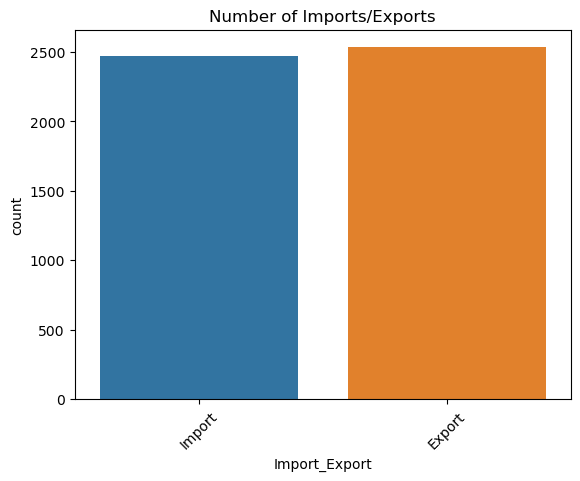

In [ ]:
# Bar chart
sns.countplot(x='Import_Export', data=sg47_sample_data)
plt.title('Number of Imports/Exports')
plt.xticks(rotation=45)
plt.show()

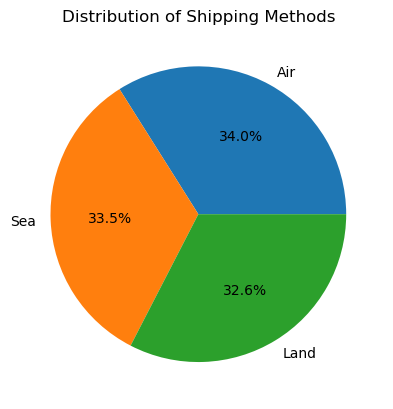

In [ ]:
# Pie chart
sg47_shipping_method_counts = sg47_sample_data['Shipping_Method'].value_counts()
plt.pie(sg47_shipping_method_counts, labels=sg47_shipping_method_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shipping Methods')
plt.show()

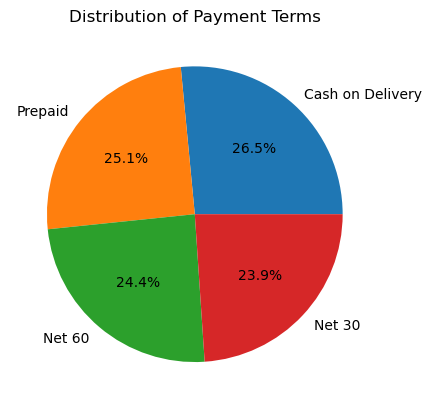

In [ ]:
# Pie chart
sg47_payment_terms_counts = sg47_sample_data['Payment_Terms'].value_counts()
plt.pie(sg47_payment_terms_counts, labels=sg47_payment_terms_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Terms')
plt.show()

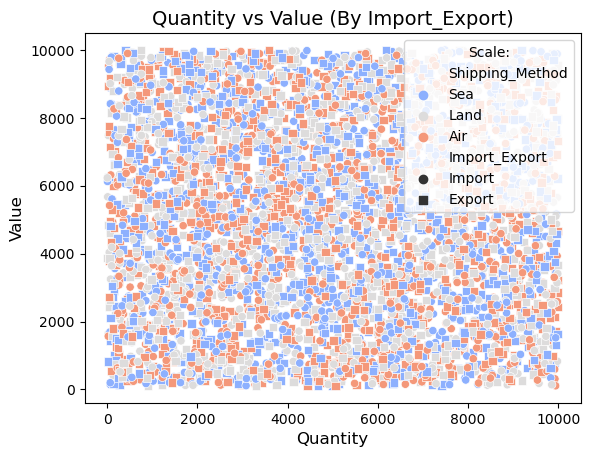

In [ ]:
# Scatter plot
sns.scatterplot(x='Quantity', y='Value', data=sg47_sample_data, hue='Shipping_Method', palette='coolwarm', style='Import_Export', markers=["o", "s"])
plt.title('Quantity vs Value (By Import_Export)', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Scale:', loc='upper right')
plt.show()

C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

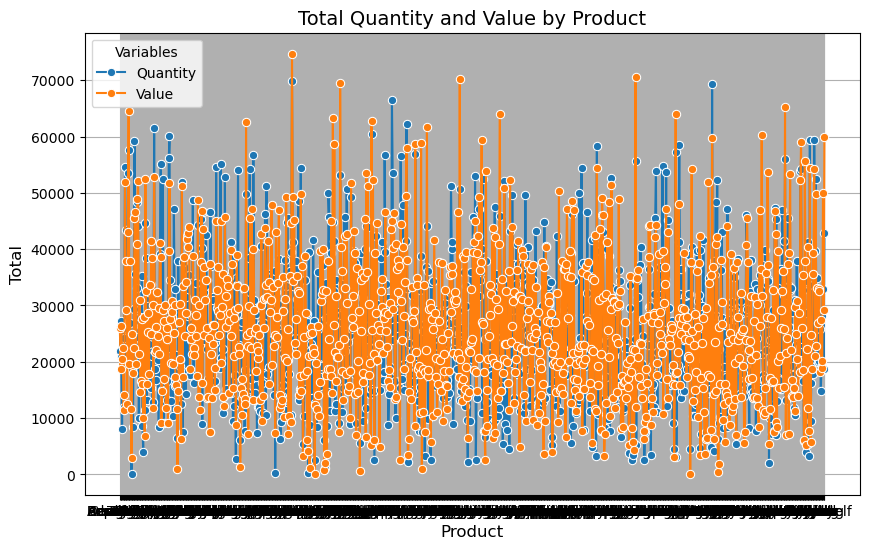

In [ ]:
# Line Plot
sg47_product_data = sg47_sample_data.groupby('Product')[['Quantity', 'Value']].sum()

# Creating the line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=sg47_product_data, x=sg47_product_data.index, y='Quantity', label='Quantity', marker='o')
sns.lineplot(data=sg47_product_data, x=sg47_product_data.index, y='Value', label='Value', marker='o')

# Adding labels and title
plt.title('Total Quantity and Value by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend(title='Variables', loc='upper left')
plt.grid(True)
plt.show()

#### _Advance Plots -  Box-Whisker | Pair | Heat_


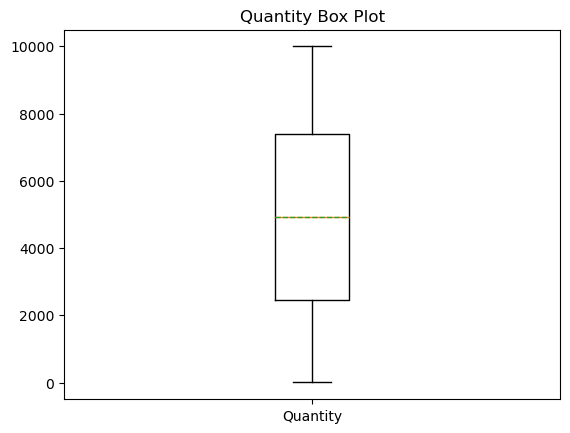

In [ ]:
# Box plot
pp.boxplot([sg47_sample_data.Quantity], meanline=True, showmeans=True, labels=['Quantity'], vert=True)
pp.title('Quantity Box Plot')
pp.show()

C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Navee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


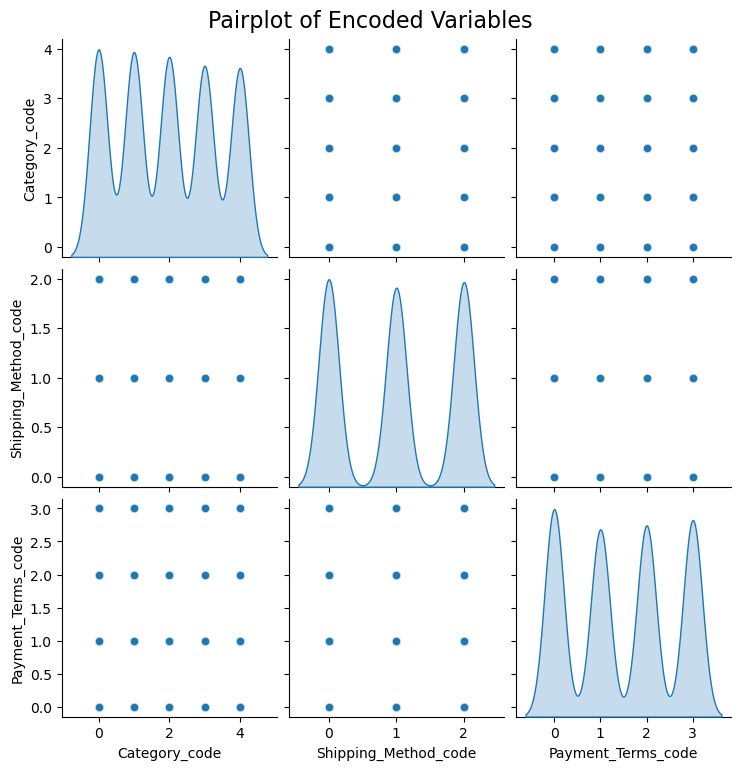

In [ ]:
# Pair Plot
sg47_numerical_columns = ['Category_code', 'Shipping_Method_code', 'Payment_Terms_code']

# Creating pairplot
sns.pairplot(sg47_encoded_codes[sg47_numerical_columns], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6})

# Show the plot
plt.suptitle('Pairplot of Encoded Variables', fontsize=16, y=1.02)
plt.show()

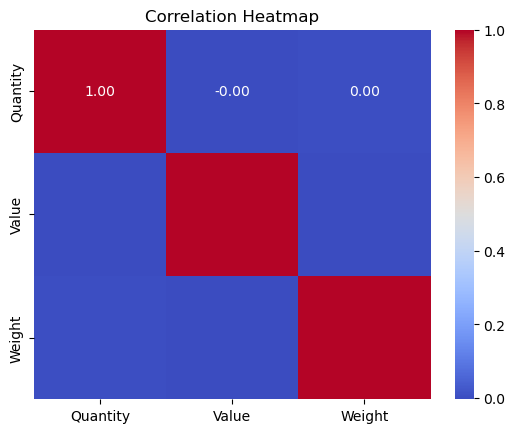

In [ ]:
# Correlation heatmap for numerical variables
correlation_matrix = sg47_sample_data[['Quantity', 'Value', 'Weight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### __Inferential Statistics__
